## Surprise Housing Regularization Model

The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation

### 1. Data understanding

In [1]:
# imported necessary libraries
import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV

In [2]:
# reading the dataset

housing = pd.read_csv('/Users/ashutosh/UG/Regularization/train.csv')

In [3]:
# dataset summary
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Dropping column which is not required.
housing.drop('Id', axis=1, inplace=True)

In [6]:
# Let's convert the columns to its proper datatypes & then we will fix the missing values.
housing['GarageYrBlt'] = housing['GarageYrBlt'].fillna(0)
housing['GarageYrBlt'] = housing['GarageYrBlt'].astype(int)

In [7]:
# Let's fix the nan values which are being treated as missing values.

housing_num_vars = housing.select_dtypes(include=['float64', 'int64'])
housing_obj_vars = housing.select_dtypes(include=['object'])

In [8]:
# We will drop the columns which contains more than 50% null values
housing.drop(['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [10]:
# We will add 0 to int/float features & 'NA' to object features which contains less than 50% null values.
# adding 0 to NaN values.
housing[['LotFrontage', 'MasVnrArea']] = housing[['LotFrontage', 'MasVnrArea']].fillna(0)

# adding NA to NaN values.
housing[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']] = housing[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']].fillna('NA')

In [11]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

As we can see, we have total of 37 columns who are numeric/float in type.

- Now we can see that we don't have any null values in the above dataset as we have either drop the columns or we have replaced the 'nan' values with 'NA' in the columns

### 2. Data Exploration

- Data Exploration
    - To perform linear regression, the (numeric) target variable should be linearly related to at least one another numeric variable. Let's see whether that's true in this case.

- We'll first subset the list of all (independent) numeric variables, and then make a pairwise plot.

In [12]:
# Let's check for the corelation between of our target variable with our numeric variables
corr = housing_num_vars.corr()
corr

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


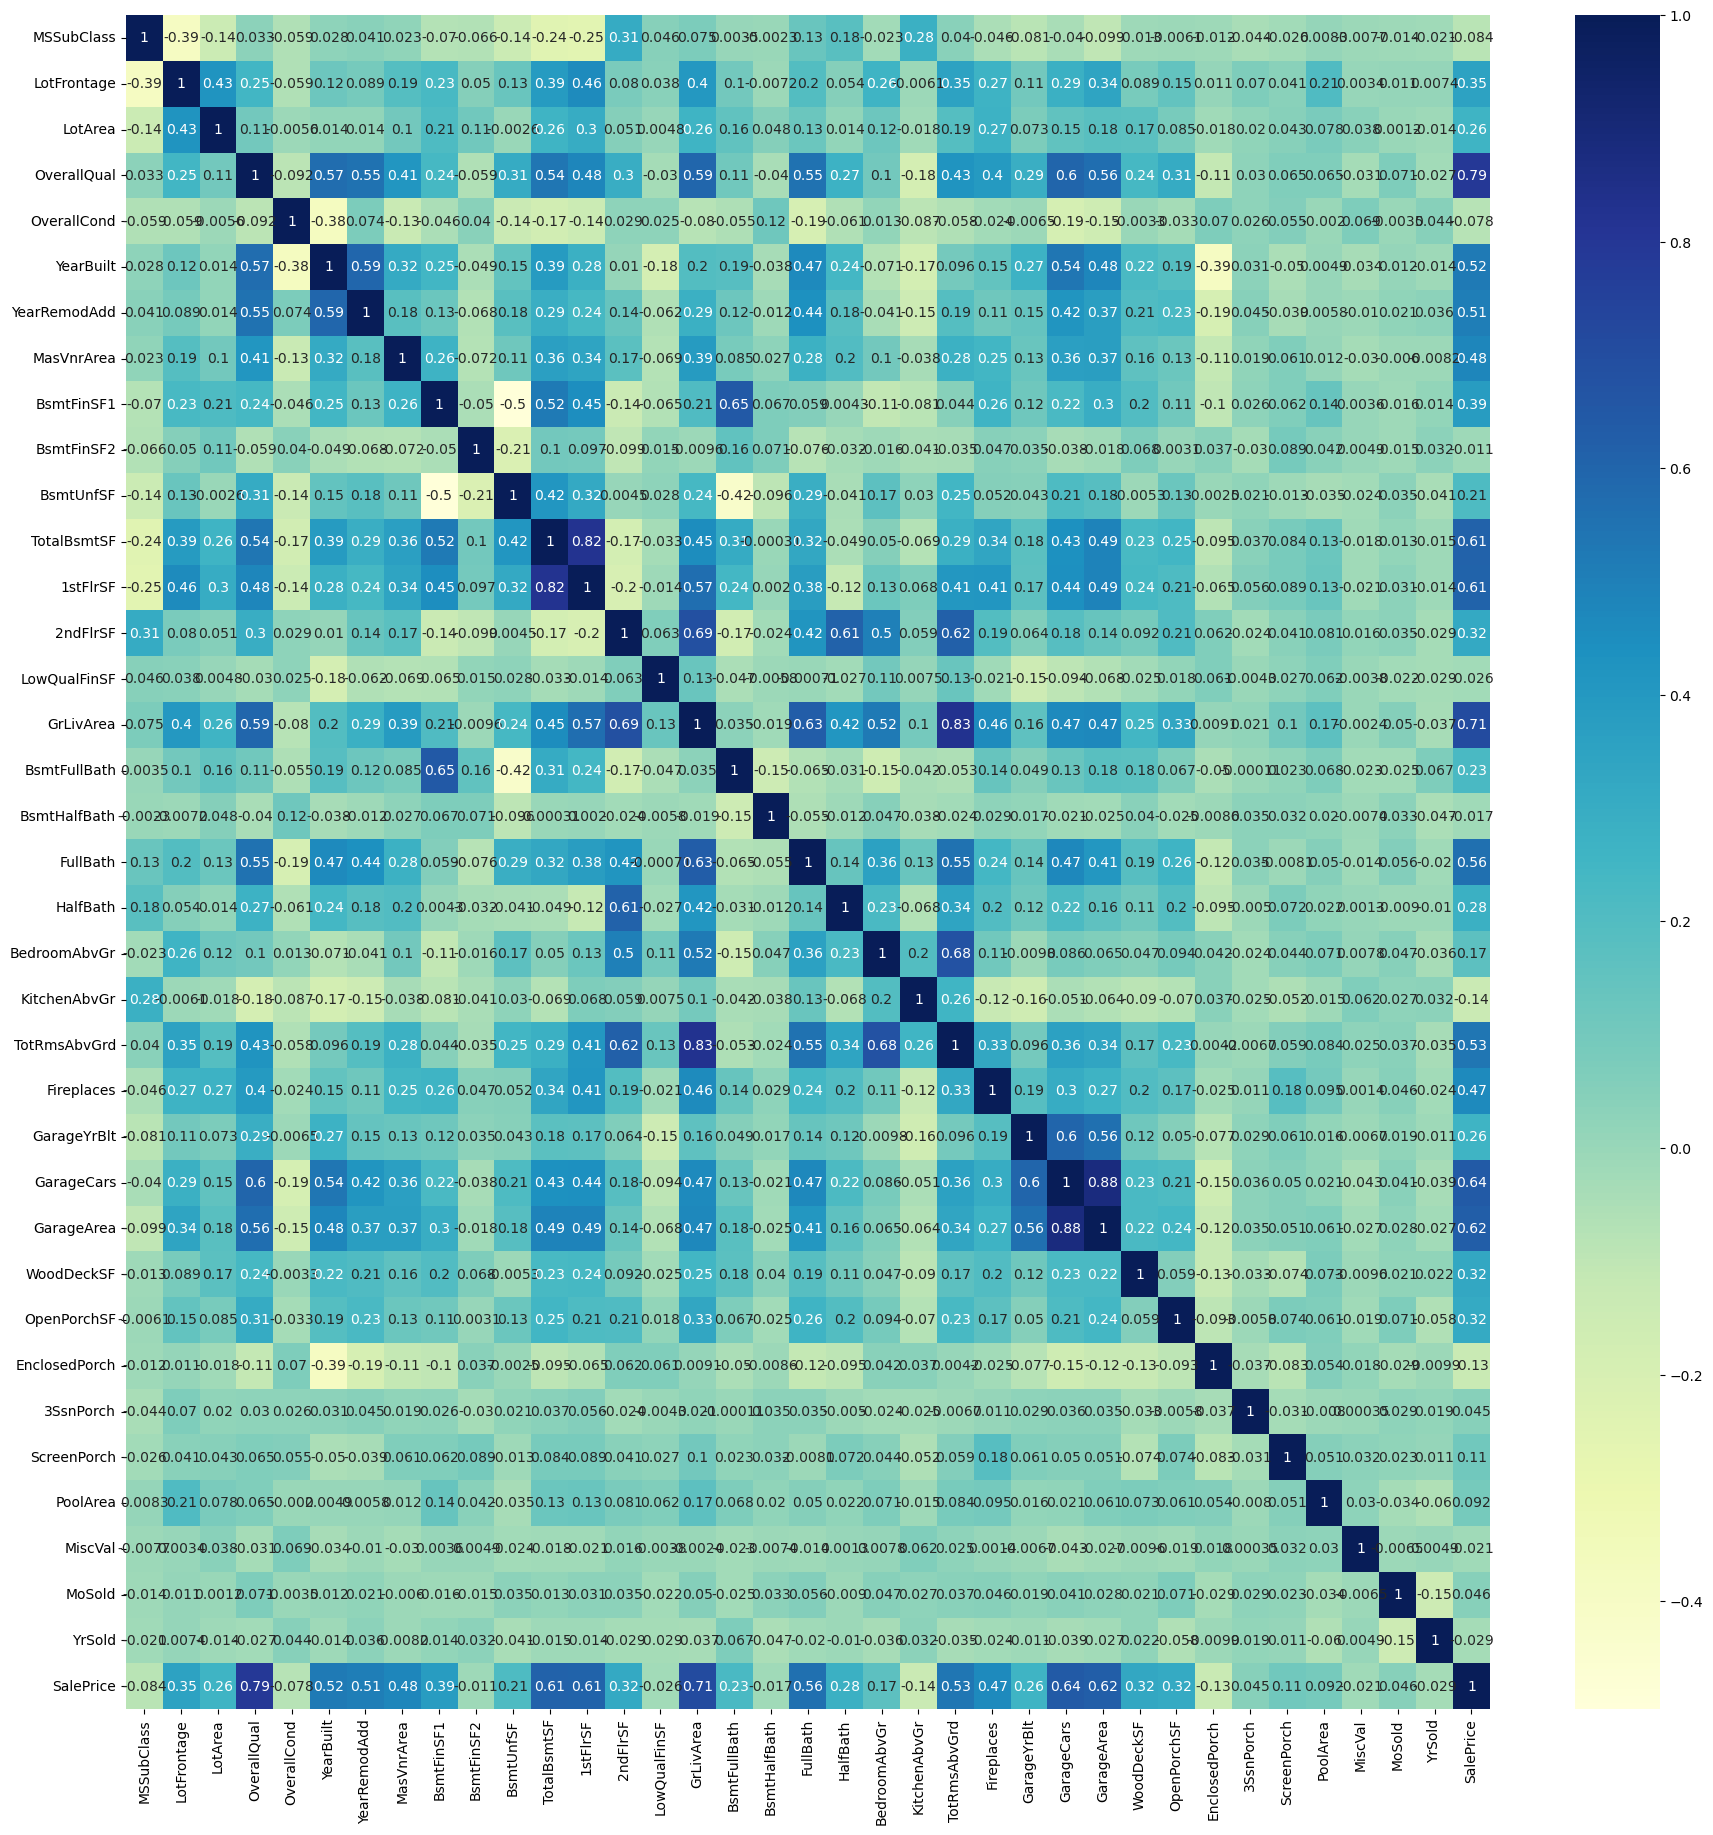

In [13]:
# With some visualization we can have greater understanding of the correlation.

# plotting correlations on a heatmap
# figure size
plt.figure(figsize=(22,22))

# heatmap
sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.show()

- From above heatmap we can consider that there are some variables which has very high positive relation with our targer variable i.e. SalePrice
- Variables like *OverallQual, GrLivArea, GarageArea, TotalBsmtSF, 1stFlrSF* have high positive correlation approximately above (0.60)
- We also have some variable which correlated but not very highly approximately in its (0.50) such as *YearRemodAdd, YearBuilt* which can have good impact on the modeling.

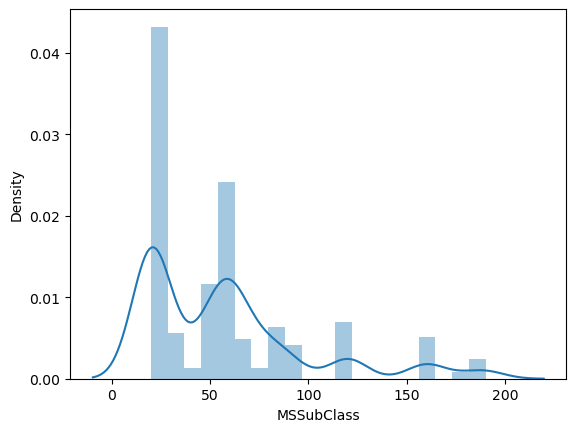

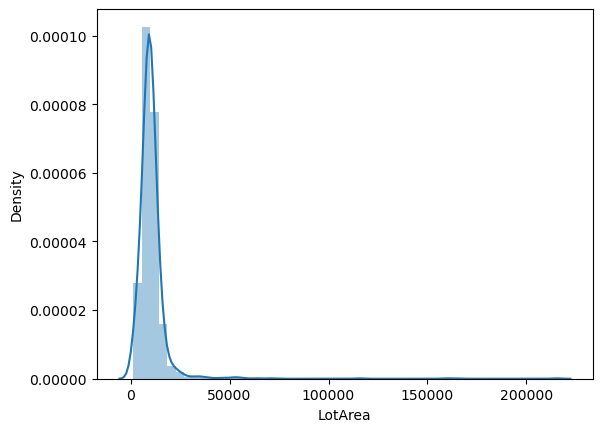

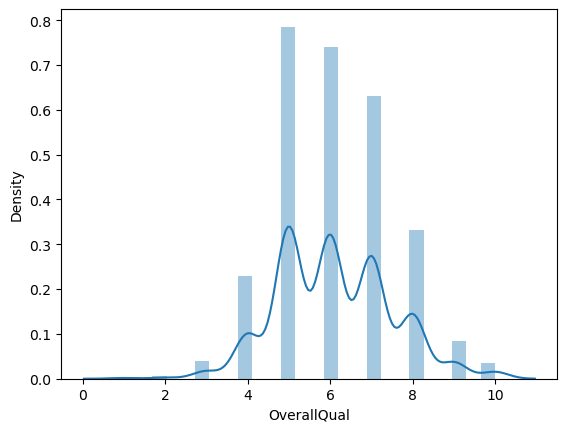

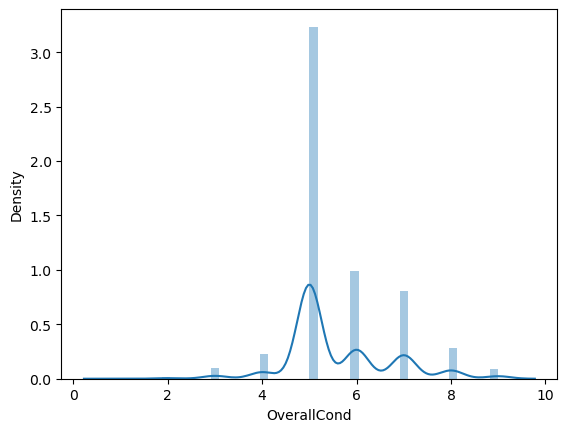

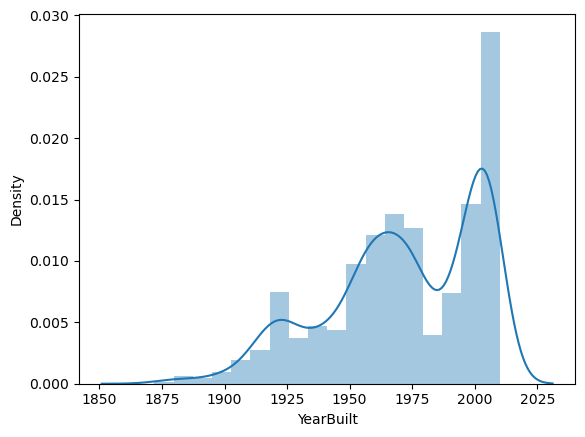

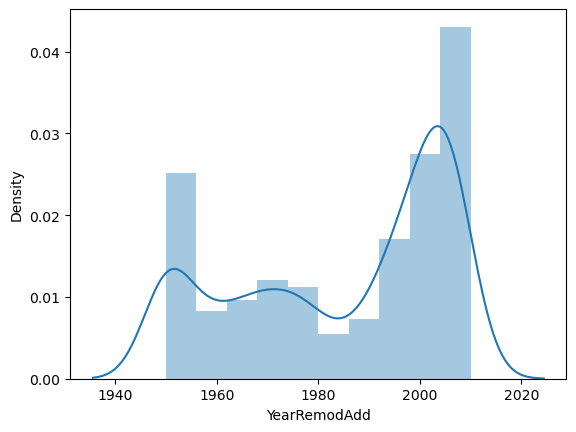

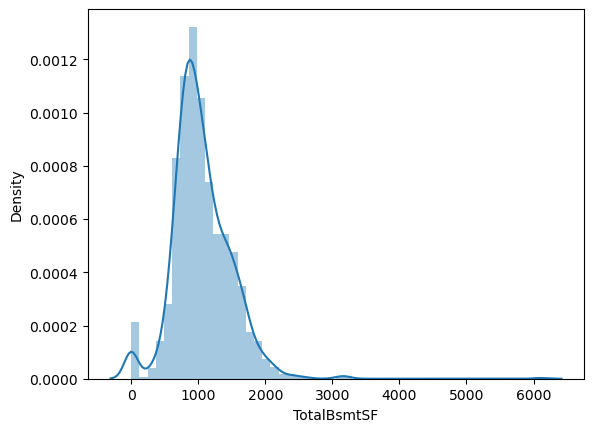

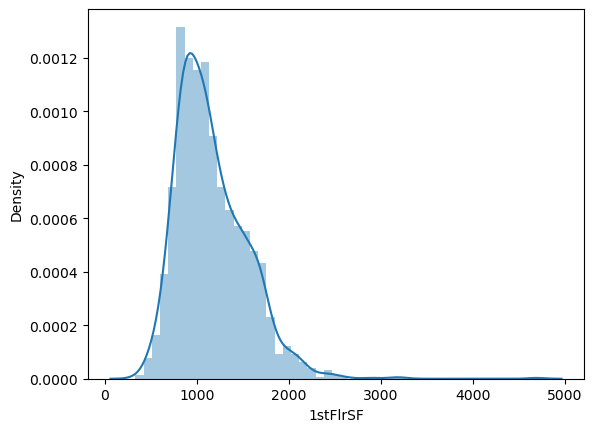

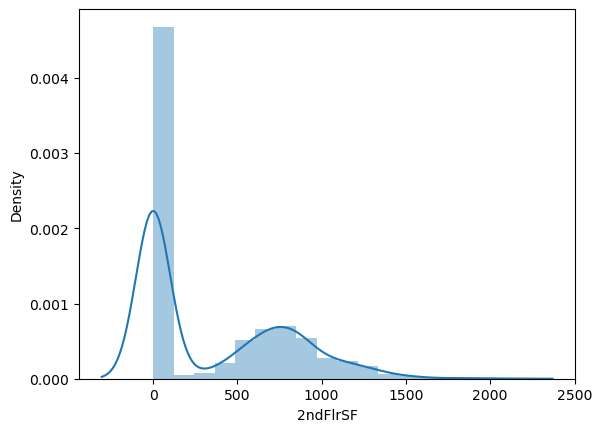

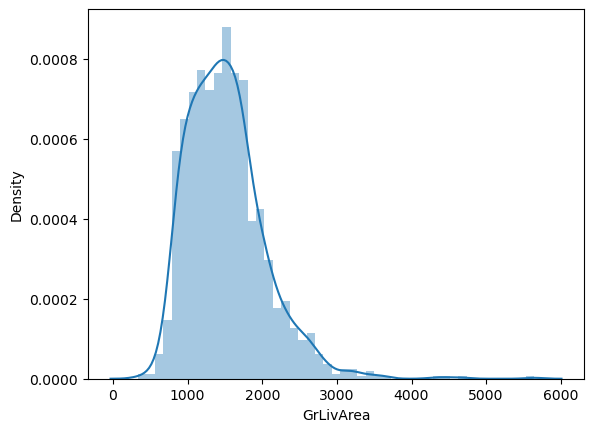

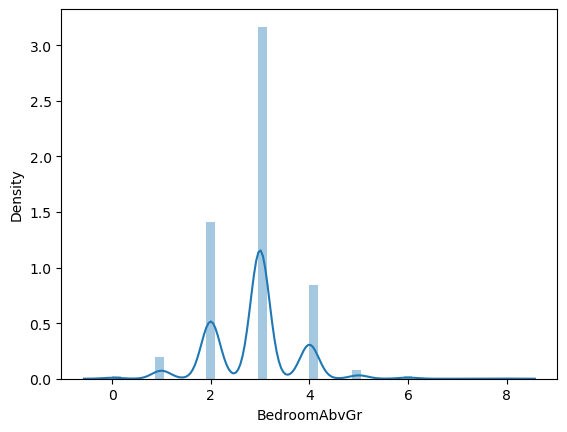

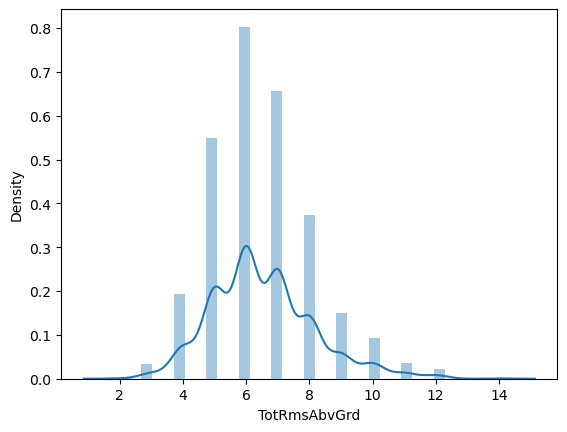

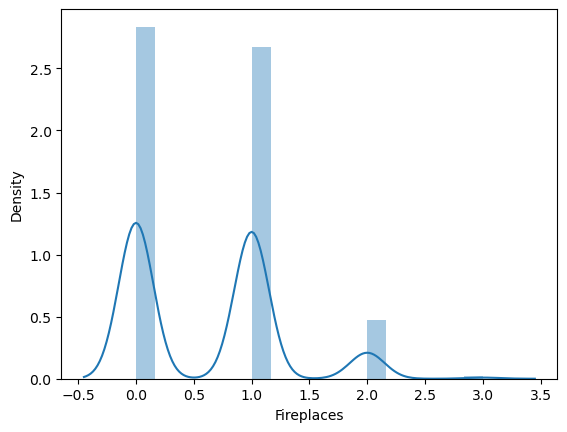

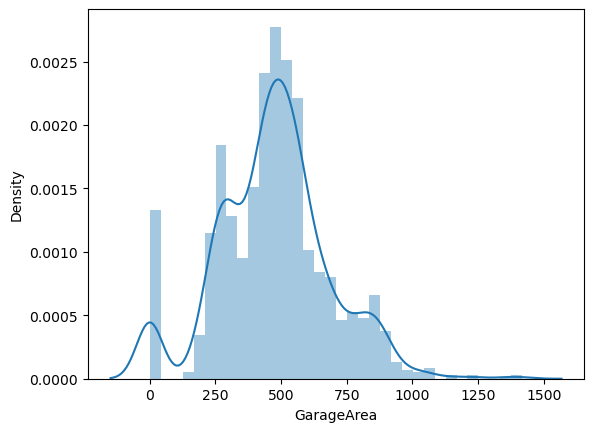

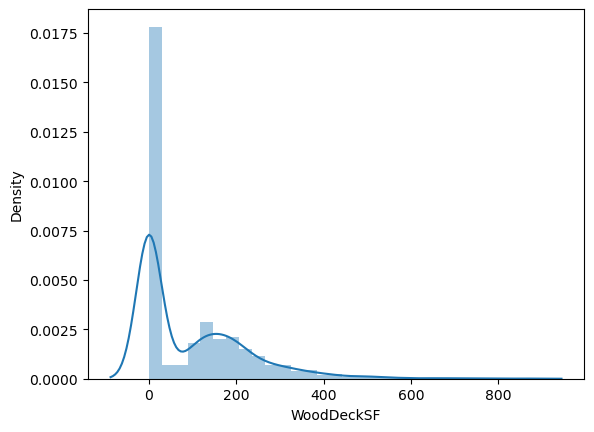

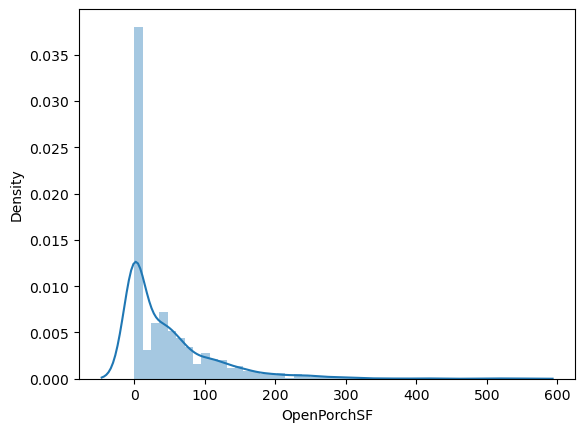

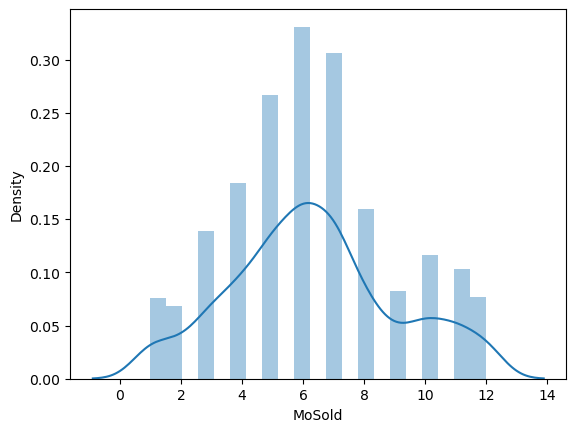

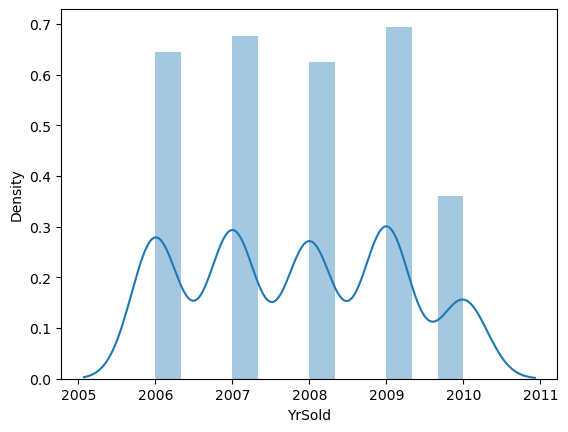

In [14]:
# let's do some more visualization
# Let's check for the distribution of independent variables.

var = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold']
for rec in var:
    plt.figure()
    sns.distplot(housing[rec])


- So above we have plotted some graphs to check the skewness of our independent numerical variables.
    - From above we can see that some of the variables are normally distributed such as *LotArea, TotalBsmtSF, 1stFlrSF, GrLivArea, OpenPorchSF*
    - Some are right skewed with certain values has increased.
    - Some are left skewed.

<Axes: xlabel='SalePrice', ylabel='Density'>

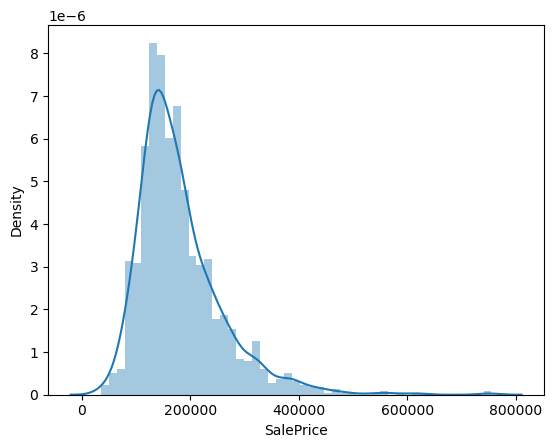

In [15]:
# Let's check for the distribution of our Dependent variable also.
plt.figure()
sns.distplot(housing['SalePrice'])

- We can see that our dependent variable is normally distributed.

### 3. Data Preparation

In [16]:
# divide our data into X & y

X = housing.drop('SalePrice', axis=1)
y = housing['SalePrice']

In [17]:
# Import label encoder 
from sklearn import preprocessing 

label_encoder = preprocessing.LabelEncoder() 

# Iterate over categorical column in X & convert all the columns to numeric.
for column in X.select_dtypes(include=['object']).columns:
    X[column] = label_encoder.fit_transform(X[column])

In [18]:
# lets scale our variables & get all the values in fixed range as all the variables are in numeric state.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_data = scaler.fit_transform(X)
X_scaled = pd.DataFrame(scaled_data,
                         columns=X.columns)

In [19]:
# now let's split the data into training & test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=1)

### 4. Model Building

- We will built 3 types of model that are
    - Linear Regression
    - Ridge Regression
    - Lasso Regression
- As our target variable is numeric, because of that we are building Linear Models
    

In [20]:
# lets start with Linear Regression
# we have already imported the necessay libraries.

# LinearModel object initialization
lrm = LinearRegression()

# Fit the model
lrm.fit(X_train, y_train)

LinearRegression()

In [21]:
for rec, col_name in enumerate(X.columns):
    print("The coefficient for {} is {}".format(col_name, lrm.coef_[rec]))

The coefficient for MSSubClass is -4427.871439619636
The coefficient for MSZoning is -776.9031876035433
The coefficient for LotFrontage is -1443.0950119276094
The coefficient for LotArea is 3364.558521608158
The coefficient for Street is 1510.2487206571247
The coefficient for LotShape is -1340.3032817920184
The coefficient for LandContour is 3470.308378627547
The coefficient for Utilities is -1772.4210478636942
The coefficient for LotConfig is 245.54800323928544
The coefficient for LandSlope is 2775.914693806811
The coefficient for Neighborhood is 2198.5034025513887
The coefficient for Condition1 is -1073.5296231189004
The coefficient for Condition2 is -2683.0900215135634
The coefficient for BldgType is -2962.2577092165
The coefficient for HouseStyle is -2140.2382609985534
The coefficient for OverallQual is 15477.271676173228
The coefficient for OverallCond is 4970.869851967849
The coefficient for YearBuilt is 4761.388843445039
The coefficient for YearRemodAdd is 1233.875071325324
The 

In [22]:
y_pred_train = lrm.predict(X_train)
y_pred_test = lrm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2_score (train): ", r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_score (test): ", r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS (train): ", rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS (test): ", rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE (train): ", mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE (test): ", mse_test_lr)
metric.append(mse_test_lr**0.5)

r2_score (train):  0.8375298159044229
r2_score (test):  0.8396479901962394
RSS (train):  987745110803.9065
RSS (test):  501493315801.85156
MSE (train):  966482495.8942333
MSE (test):  1144961908.2234054


## Ridge and Lasso Regression

Let's now try predicting house prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

- In Ridge regression lambda is the hyperparameter which we need to tune.

In [23]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 10.0, 100, 1000]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

# Printing the best hyperparameter alpha
print(model_cv.best_params_)


#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = model_cv.best_params_
ridge = Ridge(alpha=model_cv.best_params_.get('alpha'))

ridge.fit(X_train, y_train)
for rec, col_name in enumerate(X.columns):
    print("The coefficient for {} is {}".format(col_name, ridge.coef_[rec]))

Fitting 5 folds for each of 21 candidates, totalling 105 fits
{'alpha': 1000}
The coefficient for MSSubClass is -1831.8428004414038
The coefficient for MSZoning is -572.8910593581461
The coefficient for LotFrontage is 385.1885453273802
The coefficient for LotArea is 2715.8694248995657
The coefficient for Street is 760.7975716963741
The coefficient for LotShape is -1771.6356054757825
The coefficient for LandContour is 1147.3590560782645
The coefficient for Utilities is -749.1589269470084
The coefficient for LotConfig is -206.09235976064662
The coefficient for LandSlope is 1713.3880010928704
The coefficient for Neighborhood is 1844.0237378676604
The coefficient for Condition1 is -193.30526639650986
The coefficient for Condition2 is -1006.4451503584364
The coefficient for BldgType is -1991.8442683310113
The coefficient for HouseStyle is -126.73046398890075
The coefficient for OverallQual is 8188.520983643302
The coefficient for OverallCond is 2071.9924700425577
The coefficient for YearBui

In [24]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8089458250862206
0.8276198913190594
1161522824758.6953
539110625345.346
1136519398.0026374
1230846176.587548


In [25]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 10.0, 100, 1000]}

lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

# Printing the best hyperparameter alpha
print(model_cv.best_params_)

#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised
alpha = model_cv.best_params_.get('alpha')

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Fitting 5 folds for each of 21 candidates, totalling 105 fits
{'alpha': 1000}


Lasso(alpha=1000)

In [26]:
for rec, col_name in enumerate(X.columns):
    print("The coefficient for {} is {}".format(col_name, lasso.coef_[rec]))

The coefficient for MSSubClass is -5509.281645393221
The coefficient for MSZoning is -96.39313636135671
The coefficient for LotFrontage is -0.0
The coefficient for LotArea is 3113.0578579349285
The coefficient for Street is 189.5070893488971
The coefficient for LotShape is -1415.2342937536387
The coefficient for LandContour is 2174.0985800488006
The coefficient for Utilities is -533.4805448152352
The coefficient for LotConfig is -0.0
The coefficient for LandSlope is 1945.0526937923642
The coefficient for Neighborhood is 1425.6208591977506
The coefficient for Condition1 is -0.0
The coefficient for Condition2 is -1348.4420524835587
The coefficient for BldgType is -675.0067356803518
The coefficient for HouseStyle is -0.0
The coefficient for OverallQual is 17079.097336019095
The coefficient for OverallCond is 3305.8728155829567
The coefficient for YearBuilt is 2989.9573048456523
The coefficient for YearRemodAdd is 1216.236686020012
The coefficient for RoofStyle is 1049.9984504243098
The co

In [27]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.828700989465371
0.8481536475172736
1041420375578.5168
474892275389.44934
1019002324.4408188
1084228939.2453182


In [28]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),8.375298e-01,8.089458e-01,8.287010e-01
1,R2 Score (Test),8.396480e-01,8.276199e-01,8.481536e-01
2,RSS (Train),9.877451e+11,1.161523e+12,1.041420e+12
3,RSS (Test),5.014933e+11,5.391106e+11,4.748923e+11
4,MSE (Train),3.108830e+04,3.371230e+04,3.192182e+04
5,MSE (Test),3.383729e+04,3.508342e+04,3.292763e+04


## Lets observe the changes in the coefficients after regularization


In [29]:
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns

In [30]:
betas['Linear'] = lrm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [31]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Linear,Ridge,Lasso
MSSubClass,-4.427871e+03,-1831.842800,-5509.281645
MSZoning,-7.769032e+02,-572.891059,-96.393136
LotFrontage,-1.443095e+03,385.188545,-0.000000
LotArea,3.364559e+03,2715.869425,3113.057858
Street,1.510249e+03,760.797572,189.507089
LotShape,-1.340303e+03,-1771.635605,-1415.234294
LandContour,3.470308e+03,1147.359056,2174.098580
Utilities,-1.772421e+03,-749.158927,-533.480545
LotConfig,2.455480e+02,-206.092360,-0.000000
LandSlope,2.775915e+03,1713.388001,1945.052694


### 5. Model Evaluation

- So we have performed a Linear, Ridge & Lasso regression models above. 
    - From above models we can see that linear model is perfoming well on training & test data as well.
    - But in the linear model we have all the features we haven't done any feature selection, so there might be some features which are affecting our dependent variables. The data might be overfitting or underfitting.
    - So we added regularization techniques to our data.
    - We performed Ridge Regression to do some feature selection & to improve our model.
    - We did a cross validation method to get optimal lambda value to find the best fit
    - The lambda(alpha) value we got for Ridge was : 1000
    - We got a model with r2_score : 8.089458e-01 & RSS : 8.276199e-01 which was good then our Linear Regression model
    - To do some more feature selection we did a Lasso Regression as this model makes some features to 0 which might be not important for our modeling.
    - After Lasso Regression, from above coefficients table we can see that Lasso regression has made some of the features to 0.
    - But we did'nt got a good r2_score & RSS value. The values were more good in Ridge Regression.
    - The lambda value we got in Lasso Regression was: 1000
    

### 6. Subjective Questions Solving

In [32]:
# Doubling the value for alpha in Ridge & Lasso Regression.

# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]}

ridge_1 = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge_1, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

# Printing the best hyperparameter alpha
print(model_cv.best_params_)


#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = model_cv.best_params_
ridge_n_1 = Ridge(alpha=model_cv.best_params_.get('alpha'))

ridge_n_1.fit(X_train, y_train)
for rec, col_name in enumerate(X.columns):
    print("The coefficient for {} is {}".format(col_name, ridge_n_1.coef_[rec]))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'alpha': 1000}
The coefficient for MSSubClass is -1831.8428004414038
The coefficient for MSZoning is -572.8910593581461
The coefficient for LotFrontage is 385.1885453273802
The coefficient for LotArea is 2715.8694248995657
The coefficient for Street is 760.7975716963741
The coefficient for LotShape is -1771.6356054757825
The coefficient for LandContour is 1147.3590560782645
The coefficient for Utilities is -749.1589269470084
The coefficient for LotConfig is -206.09235976064662
The coefficient for LandSlope is 1713.3880010928704
The coefficient for Neighborhood is 1844.0237378676604
The coefficient for Condition1 is -193.30526639650986
The coefficient for Condition2 is -1006.4451503584364
The coefficient for BldgType is -1991.8442683310113
The coefficient for HouseStyle is -126.73046398890075
The coefficient for OverallQual is 8188.520983643302
The coefficient for OverallCond is 2071.9924700425577
The coefficient for YearBuil

In [33]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge_n_1.predict(X_train)
y_pred_test = ridge_n_1.predict(X_test)

metric4 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric4.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric4.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric4.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric4.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric4.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric4.append(mse_test_lr**0.5)

0.8089458250862206
0.8276198913190594
1161522824758.6953
539110625345.346
1136519398.0026374
1230846176.587548


In [34]:
params = {'alpha': [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]}

lasso_1 = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso_1, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

# Printing the best hyperparameter alpha
print(model_cv.best_params_)

#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised
alpha = model_cv.best_params_.get('alpha')

lasso_n_1 = Lasso(alpha=alpha)
        
lasso_n_1.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'alpha': 1000}


Lasso(alpha=1000)

In [35]:
for rec, col_name in enumerate(X.columns):
    print("The coefficient for {} is {}".format(col_name, lasso_n_1.coef_[rec]))

The coefficient for MSSubClass is -5509.281645393221
The coefficient for MSZoning is -96.39313636135671
The coefficient for LotFrontage is -0.0
The coefficient for LotArea is 3113.0578579349285
The coefficient for Street is 189.5070893488971
The coefficient for LotShape is -1415.2342937536387
The coefficient for LandContour is 2174.0985800488006
The coefficient for Utilities is -533.4805448152352
The coefficient for LotConfig is -0.0
The coefficient for LandSlope is 1945.0526937923642
The coefficient for Neighborhood is 1425.6208591977506
The coefficient for Condition1 is -0.0
The coefficient for Condition2 is -1348.4420524835587
The coefficient for BldgType is -675.0067356803518
The coefficient for HouseStyle is -0.0
The coefficient for OverallQual is 17079.097336019095
The coefficient for OverallCond is 3305.8728155829567
The coefficient for YearBuilt is 2989.9573048456523
The coefficient for YearRemodAdd is 1216.236686020012
The coefficient for RoofStyle is 1049.9984504243098
The co

In [36]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso_n_1.predict(X_train)
y_pred_test = lasso_n_1.predict(X_test)

metric5 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric5.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric5.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric5.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric5.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric5.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric5.append(mse_test_lr**0.5)

0.828700989465371
0.8481536475172736
1041420375578.5168
474892275389.44934
1019002324.4408188
1084228939.2453182


In [37]:
features = []
for rec, col_name in enumerate(X.columns):
    if lasso.coef_[rec] != 0.0:
        features.append(col_name)
print(features)

['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LandSlope', 'Neighborhood', 'Condition2', 'BldgType', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', 'Heating', 'HeatingQC', '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'PavedDrive', 'WoodDeckSF', 'ScreenPorch', 'PoolArea', 'YrSold', 'SaleCondition']


In [38]:
params = {'alpha': [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]}

lasso_2 = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso_2, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train[['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LandSlope', 'Neighborhood', 'Condition2', 'BldgType', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', 'Heating', 'HeatingQC', '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'PavedDrive', 'WoodDeckSF', 'ScreenPorch', 'PoolArea', 'YrSold', 'SaleCondition']], y_train) 

# Printing the best hyperparameter alpha
print(model_cv.best_params_)

#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised
alpha = model_cv.best_params_.get('alpha')

lasso_n_2 = Lasso(alpha=alpha)
        
lasso_n_2.fit(X_train[['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LandSlope', 'Neighborhood', 'Condition2', 'BldgType', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', 'Heating', 'HeatingQC', '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'PavedDrive', 'WoodDeckSF', 'ScreenPorch', 'PoolArea', 'YrSold', 'SaleCondition']], y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'alpha': 1000}


Lasso(alpha=1000)

In [39]:
for rec, col_name in enumerate(X.columns):
    print("The coefficient for {} is {}".format(col_name, lasso_n_2.coef_[rec]))

The coefficient for MSSubClass is -5518.660757873342
The coefficient for MSZoning is -97.56269115051137
The coefficient for LotFrontage is 3114.992882148822
The coefficient for LotArea is 189.74039723627828
The coefficient for Street is -1416.3207223338381
The coefficient for LotShape is 2173.57926761091
The coefficient for LandContour is -533.8452968511561
The coefficient for Utilities is 1944.5193461736344
The coefficient for LotConfig is 1425.5575669056166
The coefficient for LandSlope is -1348.7756262482496
The coefficient for Neighborhood is -667.1940116920646
The coefficient for Condition1 is 17087.12164184149
The coefficient for Condition2 is 3304.9350650486317
The coefficient for BldgType is 2989.343959900233
The coefficient for HouseStyle is 1216.6049877702335
The coefficient for OverallQual is 1051.1761183073331
The coefficient for OverallCond is 2936.2947133237403
The coefficient for YearBuilt is -664.82028928877
The coefficient for YearRemodAdd is 3890.100339842596
The coef

IndexError: index 49 is out of bounds for axis 0 with size 49

In [ ]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso_n_1.predict(X_train)
y_pred_test = lasso_n_1.predict(X_test)

metric6 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric6.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric6.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric6.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric6.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric6.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric6.append(mse_test_lr**0.5)